# 📊 U.S. Obesity EDA (2016–2023)

## 📑 Table of Contents

1. [Imports](#imports)
2. [Data Acquisition](#data-acquisition)
3. [Data Cleaning](#data-cleaning)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
   - [Basic Information of Dataset](#basic-information-of-dataset)
   - [Trend of Obesity Rate Over Years](#obesity-trends)
   - [Obesity by Race/Ethnicity](#obesity-by-raceethnicity)
   - [Obesity by Income](#obesity-by-income)
   - [Obesity by Education](#obesity-by-education)
   - [Obesity by Age](#obesity-by-age)
   - [Obesity by Sex](#obesity-by-sex)
   - [Obesity vs. Inactivity](#obesity-vs-inactivity)
6. [Key Findings](#key-findings)
7. [Limitations](#limitations)

## Imports <a id="imports"></a>

In [70]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [71]:
df = pd.read_csv('/content/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20250504.csv')

# **First 3 rows of Original Dataset**

In [198]:
df.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Sex,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,2011.0,Value,23.3,23.3,NaN,NaN,16.1,32.4,128,NaN,NaN,NaN,NaN,NaN,2 or more races,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,2011.0,Value,35.5,35.5,NaN,NaN,22.7,50.9,63,NaN,NaN,NaN,NaN,NaN,Other,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week,2011.0,Value,21.7,21.7,NaN,NaN,19.1,24.6,"1,702",NaN,NaN,NaN,Female,NaN,NaN,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Sex,Female,SEX,FEMALE


# Data acquisition
The dataset used in this project is derived from [the CDC’s Behavioral Risk Factor Surveillance System (BRFSS)](https://data.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7/about_data), one of the largest ongoing health surveys in the world. It includes aggregated data by demographic groups (e.g., age, gender, race/ethnicity) at the state level and tracks health behaviors such as physical activity, dietary habits, and self-reported weight status.

#**Description of Data**
**Structure:**
*   Csv file
*   104272 rows, 33 columns

**Variables:**
* many of them are qualitative nominal, along with a few that are quantitative continuous and discrete. <Br>

**Granularity**
* Each row/record is a group of individuals aggregated by demographic, and the size of each record is listed under the column “Sample_Size”.

**Scope**
* It includes data from 2011-2023, which is a long period of time. My analysis focus on more recent data like 2016-2023.
* Only data from individuals that filled out the specific survey will be collected, so bias may exist in the dataset.

**Temporality**
* The records are between 2011 and 2023, and each record has a periodicity of a year.


#**Data Cleaning** <a id="data-cleaning"></a>
The datasets are relatively clean with around 11% of missing data. Although it comes with 30+ columns, many of them are unnecessary. Since it is a dataset from government organization, the consistency of values is at a great state. <br>Data cleaning steps that I have performed include:
* Dropped Unnecessary Columns
* Dropped Duplicate Rows
* Renamed Columns in More Understandable way
* Renamed All the Questions Under "Question" Column
* Ensured Categorical Values Consistency under Columns Like Sex, Income, etc.
* Ensured no unrealistics numerical value (Proportion or Sample Size below 0)
* Extracted Data from 2016 and Later

**Challenges:**

* Despite the 11% missing values, I planned to replace or drop them later on in EDA section depending on the shape of their categories/demographs(sex, education, income, etc.)

Dropping unescessary columns and duplicate records

In [100]:
df_drop = df.drop(columns=['YearEnd', 'Datasource', 'Class', 'Data_Value_Unit','Data_Value_Type'\
                   , 'Topic', 'Low_Confidence_Limit'\
                   , 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'ClassID', 'TopicID'\
                   , 'DataValueTypeID', 'LocationID', 'StratificationCategory1', 'Stratification1'\
                   , 'StratificationID1', 'QuestionID', 'Data_Value_Alt'])


In [101]:
df_drop = df_drop.drop(df_drop.columns[5], axis=1)

In [102]:
df_drop = df_drop.drop_duplicates()

Renaming columns with more understandable names

In [199]:
 df_rename = df_drop.rename(
    columns={'YearStart': 'Year', 'LocationAbbr': 'State(Abb)',
             'Data_Value':'Proportion(%)', "Sample_Size": 'Size',
             'Age(years)': "Age", 'GeoLocation': 'Location',
             'StratificationCategoryId1': 'Category', 'LocationDesc': 'State'})

Renaming all the long questions with understandable abbreviations

In [200]:
df_rename['Question'] = df_rename['Question'].replace({
    'Percent of adults aged 18 years and older who have obesity': 'Obesity(%)',
    'Percent of adults aged 18 years and older who have an overweight classification': 'Overweight(%)',
    'Percent of adults who engage in no leisure-time physical activity': 'Inactivity(%)',
    'Percent of adults who report consuming fruit less than one time daily': 'Daily Fruit(%)',
    'Percent of adults who report consuming vegetables less than one time daily': 'Daily Veg(%)',
    'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week': 'Muscle Activity(%)',
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)':\
    '150 Aero Train(%)',
    'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)':\
    '300 Aero Train(%)',
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week':\
    '150 2Days Aero(%)'})

Extracting data after 2015 only


In [107]:
df_2016_2023 = df_rename[df_rename['Year'] >= 2016]

In [109]:
# Proportion of missing data
pct_missing = (df_2016_2023['Proportion(%)'].isnull()).mean()
print(f"{pct_missing}% of the data is missing")

0.10900783289817233% of the data is missing


In [110]:
# reset index
df_2016_2023 = df_2016_2023.reset_index(drop=True)

Ensuring if there are unrealistic numerical value under Proportion and Size


In [111]:
df_2016_2023['Size'] = df_2016_2023['Size'].str.replace(
    ',', '').str.replace('NaN', '').fillna(0).astype(int)
df_2016_2023[(df_2016_2023['Proportion(%)'] < 0) | (df_2016_2023['Size'] < 0)]

,Year,State(Abb),State,Question,Proportion(%),Size,Total,Age,Education,Sex,Income,Race/Ethnicity,Location,Category


# **First 5 Rows of Cleaned Dataset**

In [42]:
df_2016_2023.head(3)

,Year,State(Abb),State,Question,Proportion(%),Size,Total,Age,Education,Sex,Income,Race/Ethnicity,Location,Category
0,2016,US,National,Overweight(%),41.0,"198,440",NaN,NaN,NaN,Male,NaN,NaN,NaN,SEX
1,2016,DC,District of Columbia,Obesity(%),27.0,621,NaN,45 - 54,NaN,NaN,NaN,NaN,"(38.890371385, -77.031961127)",AGEYR
2,2016,IN,Indiana,Inactivity(%),16.4,458,NaN,18 - 24,NaN,NaN,NaN,NaN,"(39.766910452, -86.149960194)",AGEYR
3,2016,NM,New Mexico,Obesity(%),29.8,"1,736",NaN,NaN,NaN,NaN,NaN,Hispanic,"(34.520880952, -106.240580985)",RACE
4,2016,NM,New Mexico,Overweight(%),41.1,"2,485",NaN,NaN,NaN,Male,NaN,NaN,"(34.520880952, -106.240580985)",SEX


# **Exploratory Data Analysis (EDA)**

## Basic Info of the DataFrame

In [112]:
# shape of df
df_2016_2023.shape

(64344, 14)

In [113]:
# info of df
df_2016_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64344 entries, 0 to 64343
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            64344 non-null  int64  
 1   State(Abb)      64344 non-null  object 
 2   State           64344 non-null  object 
 3   Question        64344 non-null  object 
 4   Proportion(%)   57330 non-null  float64
 5   Size            64344 non-null  int64  
 6   Total           2298 non-null   object 
 7   Age             13788 non-null  object 
 8   Education       9192 non-null   object 
 9   Sex             4596 non-null   object 
 10  Income          16086 non-null  object 
 11  Race/Ethnicity  18384 non-null  object 
 12  Location        63168 non-null  object 
 13  Category        64344 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.9+ MB


In [114]:
# 1st row
df_2016_2023.head(1)

,Year,State(Abb),State,Question,Proportion(%),Size,Total,Age,Education,Sex,Income,Race/Ethnicity,Location,Category
0,2016,US,National,Overweight(%),41.0,198440,NaN,NaN,NaN,Male,NaN,NaN,NaN,SEX


In [115]:
# prop. of null values in each column
for col in df_2016_2023.columns:
    pct_missing = np.mean(df_2016_2023[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Year - 0%
State(Abb) - 0%
State - 0%
Question - 0%
Proportion(%) - 11%
Size - 0%
Total - 96%
Age - 79%
Education - 86%
Sex - 93%
Income - 75%
Race/Ethnicity - 71%
Location - 2%
Category - 0%


## See Trend of Obesity Rate Over Years

### Extracting Subset with National Records Only

* Records are complete, no interpolation needed

In [195]:
# Extract Records of Total Demographic Only
total_obesity = df_2016_2023[(df_2016_2023['Total'] == 'Total') & (df_2016_2023['Question'] == 'Obesity(%)')]

In [196]:
# Prop. of missing value
pct_missing = np.mean(total_obesity['Proportion(%)'].isnull())
pct_missing

np.float64(0.0136986301369863)

In [197]:
# Extract national data
US_total_obesity = total_obesity[total_obesity['State(Abb)'] == 'US']

### Visualization of National Obesity Rate Trend

In [ ]:
import plotly.express as px

fig = px.line(
    US_total_obesity,
    x='Year',
    y='Proportion(%)',
    title='Trend of the U.S. Obesity Rate (%)',
    markers=True  # Adds the individual data points on the line
)

# Optional: format axes and title
fig.update_layout(
    title_font_size=18,
    title_font_family='Arial',
    xaxis_title='Year',
    yaxis_title='Obesity Rate (%)',
    xaxis=dict(tickmode='linear'),  # Ensures all years are shown
    template='plotly_white'  # Clean background
)

fig.show()

* **Shows a strong, positive trend, with a slight drop in 2023.**

* **The largest jump occurred between 2020 and 2021.**

  * This may be linked to the COVID-19 lockdown, during which people were less active and potentially relied more on fast food for convenience.

* **Overall, obesity rose by nearly 4 percentage points in 7 years, again, suggesting obesity is a growing public health concern.**


### Extracting States/Regions Subset
* 2 missing records in 2023 are replaced by the ones from 2022

In [124]:
# Check states
df_2016_2023['State'].value_counts().sort_index().head(5)

,count
State,
Alabama,1176
Alaska,1176
Arizona,1176
Arkansas,1176
California,1176


In [125]:
# Extract State Data
state_total_obesity = total_obesity[total_obesity['State(Abb)'] != 'US']

In [126]:
# Check prop. of missing value in 2016
state_total_obesity_2016 = state_total_obesity[state_total_obesity['Year'] == 2016]
pct_missing = np.mean(state_total_obesity_2016['Proportion(%)'].isnull())
pct_missing

np.float64(0.0)

In [127]:
# Check prop. of missing value in 2023: 3%
state_total_obesity_2023 = state_total_obesity[state_total_obesity['Year'] == 2023]
pct_missing = np.mean(state_total_obesity_2023['Proportion(%)'].isnull())
pct_missing

np.float64(0.037037037037037035)

In [128]:
# Check missing data in 2023
missing_2023 = state_total_obesity_2023[state_total_obesity_2023['Proportion(%)'].isnull()]
missing_2023

,Year,State(Abb),State,Question,Proportion(%),Size,Total,Age,Education,Sex,Income,Race/Ethnicity,Location,Category
57099,2023,KY,Kentucky,Obesity(%),NaN,0,Total,NaN,NaN,NaN,NaN,NaN,"(37.645970271000465, -84.77497104799966)",OVR
61370,2023,PA,Pennsylvania,Obesity(%),NaN,0,Total,NaN,NaN,NaN,NaN,NaN,"(40.79373015200048, -77.86070029399963)",OVR


In [129]:
# replace 2023 missing values with 2022 data
state_total_obesity = state_total_obesity.sort_values(by=['State', 'Year'])

# Forward fill within each state
state_total_obesity['Proportion(%)'] = state_total_obesity.groupby('State')['Proportion(%)'].transform(lambda x: x.ffill())
# double check if missing data is replaced
state_total_obesity_2023 = state_total_obesity[state_total_obesity['Year'] == 2023]
pct_missing = np.mean(state_total_obesity_2023['Proportion(%)'].isnull())
pct_missing

np.float64(0.0)

In [130]:
# 2016 df
state_total_obesity_2016 = state_total_obesity[state_total_obesity['Year'] == 2016]
state_total_obesity_2016.head(1)

,Year,State(Abb),State,Question,Proportion(%),Size,Total,Age,Education,Sex,Income,Race/Ethnicity,Location,Category
160,2016,AL,Alabama,Obesity(%),35.7,6526,Total,NaN,NaN,NaN,NaN,NaN,"(32.840571122, -86.631860762)",OVR


In [133]:
# join 2016 and 2023 df
state_total_obesity_difference = state_total_obesity_2016[['State(Abb)', 'State', 'Proportion(%)']].merge(
    state_total_obesity_2023[['State(Abb)', 'State', 'Proportion(%)']],
    on=['State(Abb)', 'State'],
    suffixes=('_2016', '_2023')
)

In [134]:
# find the difference between 2016 and 2023
state_total_obesity_difference['Difference'] = state_total_obesity_difference['Proportion(%)_2023'] - state_total_obesity_difference['Proportion(%)_2016']
state_total_obesity_difference.sort_values(by='Difference', ascending=False, inplace=True)

### Visualization of Change of Obesity Rate of States/Regions Between 2016 and 2023

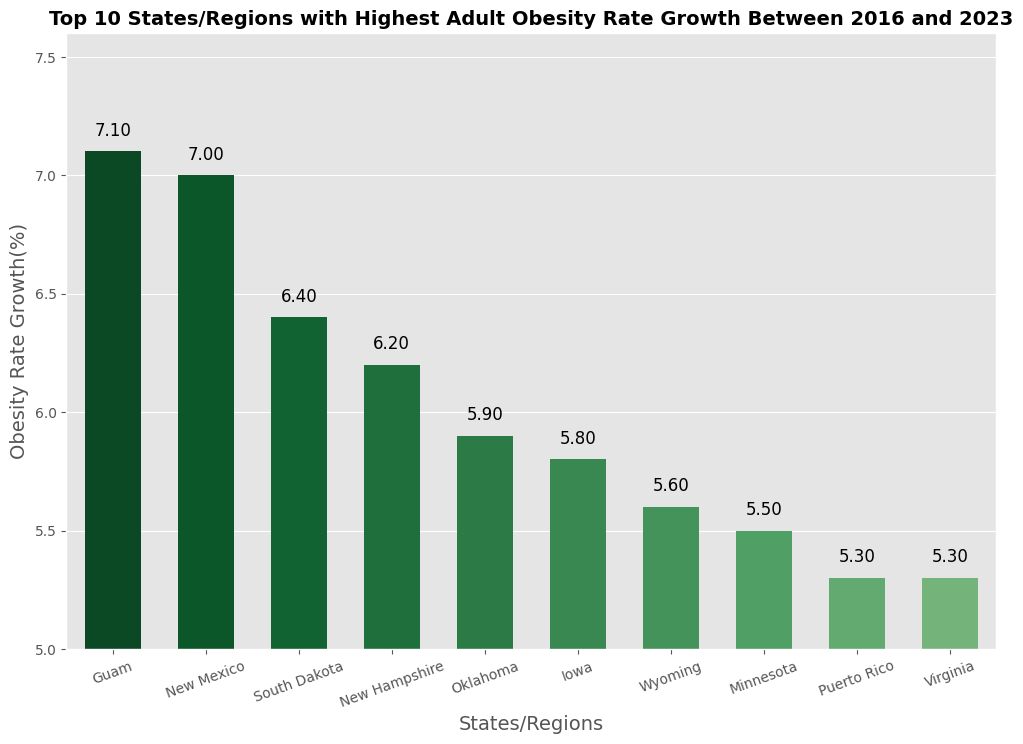

In [135]:
# Visualization of Top 10 States/Regions with Highest Obesity Rate Growth Between 2016 and 2023
top_10 = state_total_obesity_difference.head(10)
green_palette = sns.color_palette("Greens", n_colors=20)[5:][::-1]
sns.barplot(x='State', y='Difference', data=top_10, palette=green_palette, gap=1.75)
plt.title('Top 10 States/Regions with Highest Adult Obesity Rate Growth Between 2016 and 2023', fontsize=14, fontweight='bold')
plt.xlabel('States/Regions', fontsize=14)
plt.ylabel('Obesity Rate Growth(%)', fontsize=14)
plt.xticks(rotation=20)
plt.ylim(5.0, 7.6) # top_10['Difference'].max() + 0)
for i, val in enumerate(top_10['Difference']):
    plt.text(i, val + 0.05, f'{val:.2f}', ha='center', va='bottom', fontsize=12)
plt.show();

* Regions like Guam (7.1%) and states like New Mexico (7.0%) show the largest growth in adult obesity rates.

* Most of the locations in this top group, had increases between 5.3% and 6.4%.

* These sharp increses may indicate:

  * Emerging public health challenges

  * Insufficient access to healthcare, nutrition, or preventive programs

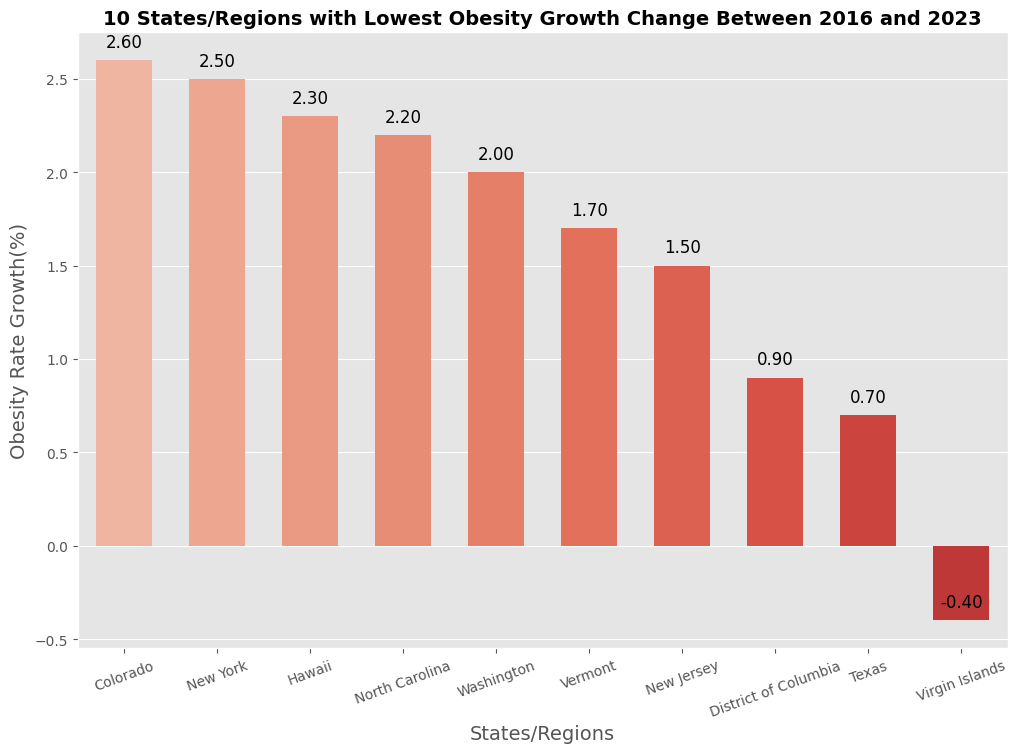

In [136]:
# Visualization of the 10 States/Regions with Lowest Obesity Rate Growth Between 2016 and 2023
low_10 = state_total_obesity_difference.tail(10)
red_palette = sns.color_palette("Reds", n_colors=20)[5:]
sns.barplot(x='State', y='Difference', data=low_10, palette=red_palette, gap=1.75)
plt.title('10 States/Regions with Lowest Obesity Growth Change Between 2016 and 2023', fontsize=14, fontweight='bold')
plt.xlabel('States/Regions', fontsize=14)
plt.ylabel('Obesity Rate Growth(%)', fontsize=14)
plt.xticks(rotation=20)
for i, val in enumerate(low_10['Difference']):
    plt.text(i, val + 0.05, f'{val:.2f}', ha='center', va='bottom', fontsize=12)
plt.show();

* States like Texas (0.7%) ad New Jersey saw the smallest increases in obesity rate.

* Notably, the Virgin Islands (-0.4%) experienced a decline in obesity over years.


### 💡 Key Findings from Obesity Rate by States/Regions:

* Obesity rate growth varies widely across U.S. — ranging from a decline of 0.4% to a 7.1% increase between 2016 and 2023.

* States such as New Jersey and Texas had low growth, they might offer insights or best practices in health policy, education or food access that could benefit higher-growth regions.

* States with high increases like New Mexico and South Dakota, may need targeted interventions.

* Overall, obesity is not rising evenly.

## Explore the Relationship between Obesity and Race/Ethnicity

### Extract Subset of Obesity Rate Between Race/Ethnicity
* 34% missing data
* Dropped all missing records, possibly create biases especially for smaller size categories

In [142]:
# Extract records related to obesity rate and race
race_obesity = df_2016_2023[(df_2016_2023['Category'] == 'RACE') & (df_2016_2023['Question'] == 'Obesity(%)')]

In [138]:
# Check missing prop.: 34% data missing
pct_missing = np.mean(race_obesity['Proportion(%)'].isnull())
pct_missing

np.float64(0.3387557077625571)

In [143]:
# Extract complete records
race_obesity_complete = race_obesity[['Year', 'State', 'Proportion(%)', 'Race/Ethnicity']].dropna()

In [140]:
# Categories of Race/Ethnicity
race_obesity_complete['Race/Ethnicity'].value_counts()

,count
Race/Ethnicity,
Non-Hispanic White,424
Hispanic,422
2 or more races,396
Non-Hispanic Black,354
Asian,290
American Indian/Alaska Native,274
Other,124
Hawaiian/Pacific Islander,33


### Visualization and Comparison of Obesity Rate of Different Race/Ethnicity

Distribution of Obesity Rate by Race/Ethnicity


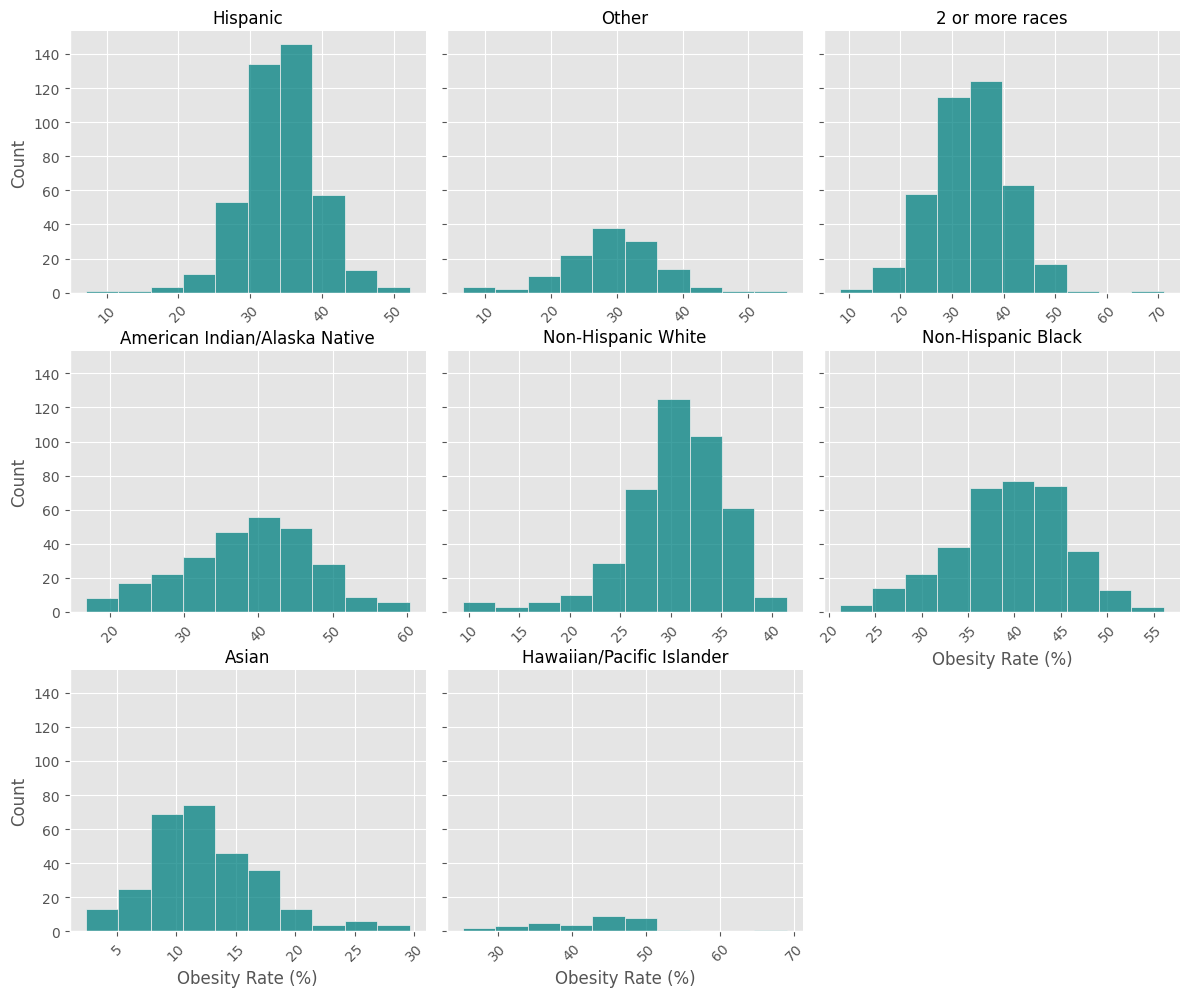

In [141]:
# Check distribution of complete records
g = sns.FacetGrid(race_obesity_complete, col="Race/Ethnicity", col_wrap=3, height=4, sharex=False)
g.map(sns.histplot, "Proportion(%)", bins=10, color='teal')

# Force axis labels and fix layout
g.set_axis_labels("Obesity Rate (%)", "Count")
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
g.fig.subplots_adjust(top=0.9, bottom=0.15)
print('Distribution of Obesity Rate by Race/Ethnicity')
plt.show();

**Asian adults:**
* Have the lowest obesity rates, mostly between 10%–20%
* Distribution is tight and consistent, indicating low variability

**Non-Hispanic Black and Hispanic adults and 2 or More Races:**

* Show higher obesity rates, typically between 30%–45%
* Distributions are more concentrated, suggesting consistent trends over time

**Non-Hispanic White adults:**

* Slightly lower rates than Black and Hispanic groups
* Mostly clustered between 25%–35%

**American Indian/Alaska Native**

* Show wider and more skewed distributions
* Some values reach above 60%, with more variation
* Smaller sample sizes, might not reflect the truth

**Other and Hawaiian/Pacific Islander:**
* Also show broad distributions and variability
* **Smaller sample sizes, might not reflect the truth**


### 💡 Key Findings of Obesity Rate of Different Ethnicity Group:

* Surprisingly, the data reflect that Obesity Rates are not evenly distributed across racial/ethnic groups.

* There may be several contributing factors, such as dietary habits, for example:

  * some cultures may consume more nutrient-dense foods like rice, while others may have a preference for higher-calorie meals.



## Explore the Relationship between Obesity and Income

### Extract subset of Obesity Rate of Different Income Group

* About 15% of missing and unreported data
* Dropped all incomplete records



In [158]:
# Extract subset about obesity rate and income demographic
income_obesity = df_2016_2023[(df_2016_2023['Category'] == 'INC') & (df_2016_2023['Question'] == 'Obesity(%)')]

In [159]:
# Check missing prop.: 15% data missing
pct_missing = np.mean(income_obesity['Proportion(%)'].isnull())
pct_missing += np.mean(income_obesity['Income'] == 'Data not reported')
pct_missing

np.float64(0.15688193085453359)

In [160]:
# Low missing rate, only keep the complete record
income_obesity_complete = income_obesity[['Year', 'State', 'Proportion(%)', 'Income']].dropna()
income_obesity_complete = income_obesity_complete[income_obesity_complete['Income'] != 'Data not reported']

In [161]:
# Sort Income Group from Low to High
income_group = income_obesity_complete['Income'].value_counts().sort_index().reset_index()
income_order = [2, 3, 4, 5, 6, 1]
income_group['Order'] = income_order
income_obesity_complete = income_obesity_complete.merge(
    income_group[['Income', 'Order']], on='Income').sort_values(by='Order')

### Visualization of Obesity Rate by Income Group

**While higher income often means a “fatter” wallet, does it also correlate with greater body weight?**

In [162]:
# Categories of Income Group
print('Categories of Income Group:')
income_obesity_complete[['Income', 'Order']].value_counts().reset_index().sort_values(by='Order')[['Income']].reset_index(drop=True)


Categories of Income Group:


,Income
0,"Less than $15,000"
1,"$15,000 - $24,999"
2,"$25,000 - $34,999"
3,"$35,000 - $49,999"
4,"$50,000 - $74,999"
5,"$75,000 or greater"


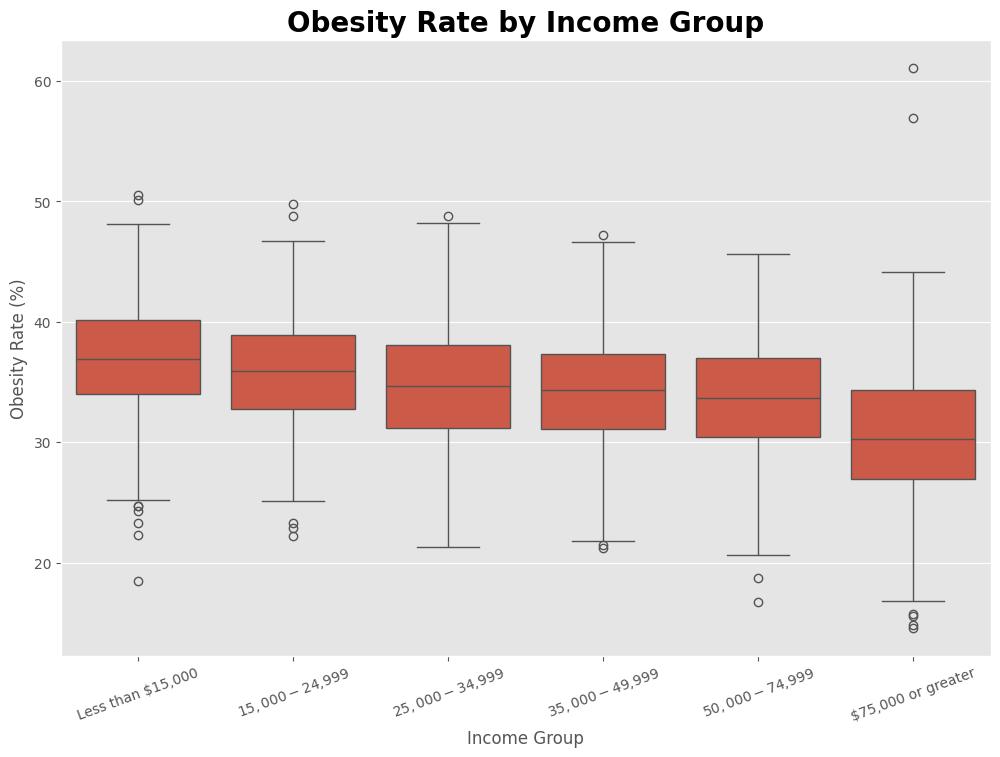

In [163]:
# Boxplot of Obesity Rate by Income Group
sns.boxplot(data=income_obesity_complete, x='Income', y='Proportion(%)')
plt.xticks(rotation=20)
plt.title('Obesity Rate by Income Group', fontsize=20, fontweight='bold')
plt.xlabel('Income Group')
plt.ylabel('Obesity Rate (%)');

**Trend:**
* Obesity rates decrease as income increases, showing a clear inverse relationship. (median, 1st and 3rd quatiles all show a declining trend)

**Lowest income group (“< $15,000”):**

* Highest median obesity rate (~37–38%)

* Widest spread with more high-end outliers

**Highest income group (“$75,000 or greater”):**

* Lowest median (~30%)

* Tighter distribution, fewer extreme values

**Outliers:**

* All income groups have some outliers

* But the lowest and highest income groups show the most extreme values/outliers

### 💡 Key Findings of Obesity Rate by Income Group
* Income is a strong socioeconomic factor in obesity disparities.

* Individuals in lower income brackets may face barriers like:

  * Limited access to healthy food

  * Fewer opportunities for physical activity

  * Less health education or support

## Explore the Relationship between Obesity and Biological Gender

### Extract subset of Obesity Rate Related to Sex

* 1.4% missing records
* Dropped all missing records

In [164]:
# Extract records that are related to obesity and gender
gender_obesity = df_2016_2023[(df_2016_2023['Category'] == 'SEX') & (df_2016_2023['Question'] == 'Obesity(%)')]

In [165]:
# Check categories
gender_obesity['Sex'].value_counts()

,count
Sex,
Male,438
Female,438


In [166]:
# Check prop. of missing data: 1.4% missing
pct_missing = np.mean(income_obesity['Proportion(%)'].isnull())
pct_missing

np.float64(0.014024787997390736)

In [167]:
# Drop incomplete records
gender_obesity_complete = gender_obesity[['Year', 'State', 'Proportion(%)', 'Sex']].dropna()

In [169]:
# mean of obesity rate for both genders
male_obesity = gender_obesity_complete[gender_obesity_complete['Sex'] == 'Male']
female_obesity = gender_obesity_complete[gender_obesity_complete['Sex'] == 'Female']
male_mean = np.mean(male_obesity['Proportion(%)'])
female_mean = np.mean(female_obesity['Proportion(%)'])
male_mean, female_mean

(np.float64(31.73263888888889), np.float64(32.43958333333333))

### Visualization of Obesity Rate by Sex

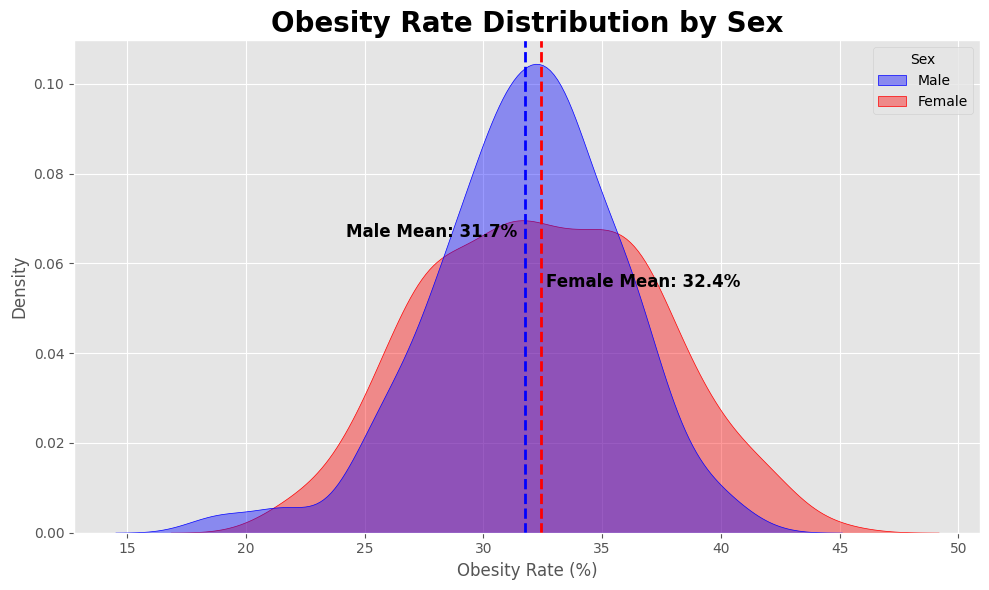

In [170]:
# Set up color mapping for consistency
color_map = {'Male': 'blue', 'Female': 'red'}
plt.figure(figsize=(10, 6))
# KDE plot with fill
sns.kdeplot(data=gender_obesity_complete, x='Proportion(%)', hue='Sex', common_norm=False,
            fill=True, alpha=0.4, palette=color_map)
# Plot mean lines + label for each group
for sex in ['Male', 'Female']:
    mean_val = gender_obesity_complete[gender_obesity_complete['Sex'] == sex]['Proportion(%)'].mean()
    color = color_map[sex]
    plt.axvline(mean_val, linestyle='--', color=color, linewidth=2)
# Label for each gender
plt.text(male_mean - 7.5, plt.ylim()[1] * 0.6, f'Male Mean: {male_mean:.1f}%',
             color='black', fontsize=12, fontweight='bold')
plt.text(female_mean + 0.2, plt.ylim()[1] * 0.5, f'Female Mean: {female_mean:.1f}%',
             color='black', fontsize=12, fontweight='bold')
# Final touches
plt.title('Obesity Rate Distribution by Sex', fontsize=20, fontweight='bold')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Density')
plt.tight_layout();

* The KDE plot compares the distribution of obesity rates between adult males and females in the U.S.

* Females have a slightly higher mean rate (32.4%) than males (31.7%).

* While both distributions are approximately normal, but the female curve is slightly wider.

* Huge overlap area between the two curves.

### 💡 Key Findings from Obesity Rate by Sex

* Greater spread among females suggests more variation in obesity within the gender group
*
While the data shows that females tend to have a slightly higher average obesity rate, the  overlap between the two distr. indicates that obesity affects both sexes similarly.

* Sex may play a minor role in obesity trends, but based on this distribution alone, it may not be a strong standalone predictor.

##Explore the Relationship between Obesity and Education

###Extract subset related to obesity rate and education

* Dropped 1.4% missing record

In [171]:
# Extract subset
ed_obesity = df_2016_2023[(df_2016_2023['Category']=='EDU') & (df_2016_2023['Question']=='Obesity(%)')]

In [172]:
# Dropping unnecessary columns
ed_obesity = ed_obesity[['Year', 'State', 'Proportion(%)', 'Education']]

In [174]:
# Check missing data: 1.4% missing
pct_missing = np.mean(ed_obesity['Proportion(%)'].isnull())
pct_missing

np.float64(0.0)

In [173]:
# Drop missing data
ed_obesity = ed_obesity.dropna()

In [175]:
# Sort Education Group from Low to High
ed_group = ed_obesity['Education'].value_counts().sort_index().reset_index()
ed_order = [4, 2, 1, 3]
ed_group['Order'] = ed_order
ed_obesity_ordered = ed_obesity.merge(
    ed_group[['Education', 'Order']], on='Education').sort_values(by='Order')

In [176]:
# get median of each education level
ed_median = ed_obesity_ordered.groupby('Education')['Proportion(%)'].median()
ed_median

,Proportion(%)
Education,
College graduate,26.60
High school graduate,34.30
Less than high school,35.60
Some college or technical school,34.35


In [177]:
# store the medians into a dictionary
medians = {
    'Less than high school': 35.6,
    'High school graduate': 34.3,
    'Some college or technical school': 34.35,
    'College graduate': 26.60
}

### Visualization of Obesity Rate by Education Level

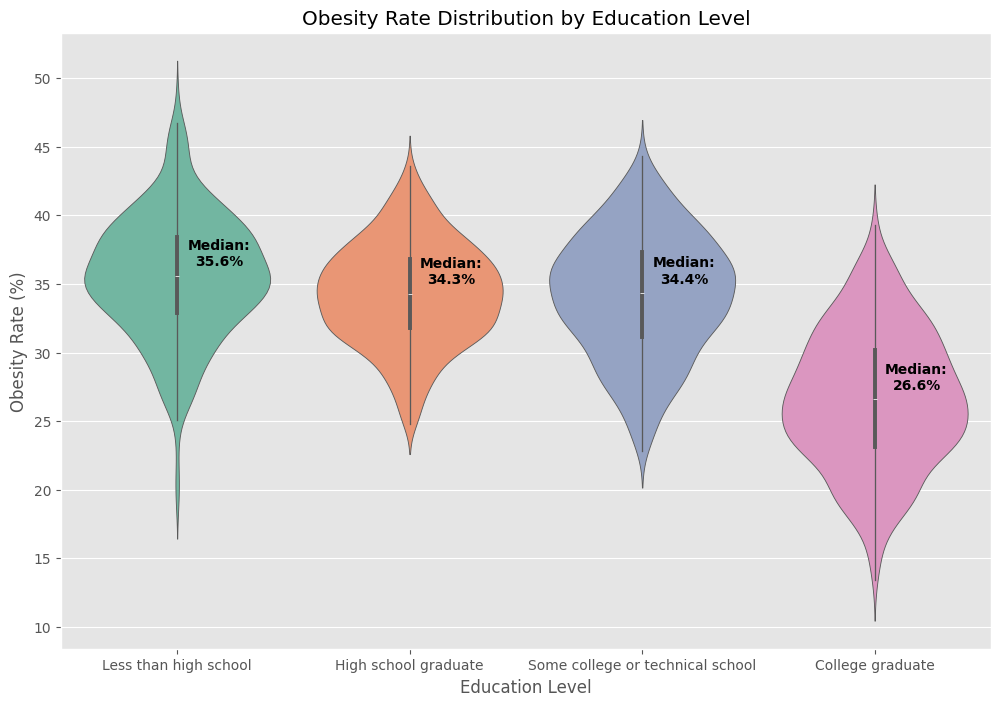

In [179]:
# Create violin plot
sns.violinplot(data=ed_obesity_ordered, x='Education', y='Proportion(%)', palette='Set2', inner='box')
plt.title('Obesity Rate Distribution by Education Level')
plt.ylabel('Obesity Rate (%)')
plt.xlabel('Education Level')
for i, (edu_level, median_val) in enumerate(medians.items()):
    plt.text(i+0.18, median_val + 0.5, f'Median:\n{median_val:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

* Obesity rates gradually decline across the first three education levels, but drop sharply for college graduates.

* College graduates show the lowest median (26.6%) vs. 34-36% for the other groups.

* Distributions:
  * Less than high school: right skewed
  * High School: approximately normal
  * Some college: slightly left-skewed
  * College graduate: more spreaded but approximately normal

### 💡 Key Findings from Obesity Rate by Education Level

* Major reduction in obesity appears only at the college graduate level.

* Higher education is tied to lower and more stable obesity outcomes.
  * Perhaps higher education provide better health education or even critical thinking skills that help those graduates maintain healthier life-style.

* More outliers and spread in lower education group (~16-53%) show less health consistency.

## Explore the Relationship between Obesity and Age

### Extract Subset of Obesity Rate and Age Group

* Dropped 1.3% missing records

In [180]:
# Extract related records
age_obesity = df_2016_2023[(df_2016_2023['Category'] == 'AGEYR') & (df_2016_2023['Question'] == 'Obesity(%)')]

In [181]:
# Check missing records: 1.3% missing
pct_missing = np.mean(age_obesity['Proportion(%)'].isnull())
pct_missing

np.float64(0.0136986301369863)

In [182]:
# Drop missing records:
age_complete = age_obesity[['Year', 'State', 'Proportion(%)', 'Age']].dropna()
age_complete.sort_values(by='Age', inplace=True)
age_complete.shape, age_complete.head(3)

((2592, 4),
        Year     State  Proportion(%)      Age
 46417  2021      Ohio           21.8  18 - 24
 6757   2017  Delaware           15.5  18 - 24
 19820  2018  Illinois           16.8  18 - 24)

In [184]:
# see avg of each group
age_avg = age_complete.groupby('Age')['Proportion(%)'].mean()
age_avg

,Proportion(%)
Age,
18 - 24,19.595833
25 - 34,31.165741
35 - 44,35.834491
45 - 54,38.504630
55 - 64,36.599074
65 or older,29.300694


In [185]:
# see median of each group
age_median = age_complete.groupby('Age')['Proportion(%)'].median()
age_median

,Proportion(%)
Age,
18 - 24,19.5
25 - 34,31.1
35 - 44,35.8
45 - 54,38.7
55 - 64,36.6
65 or older,29.6


In [186]:
# Create a dictionary to display medians on the plot
medians = {
    '18 - 24': 19.5,
    '25 - 34': 31.1,
    '35 - 44': 35.8,
    '45 - 54': 38.7,
    '55 - 64': 36.6,
    '65 or older': 29.6
}

### Visualizations of Obesity Rate by Age

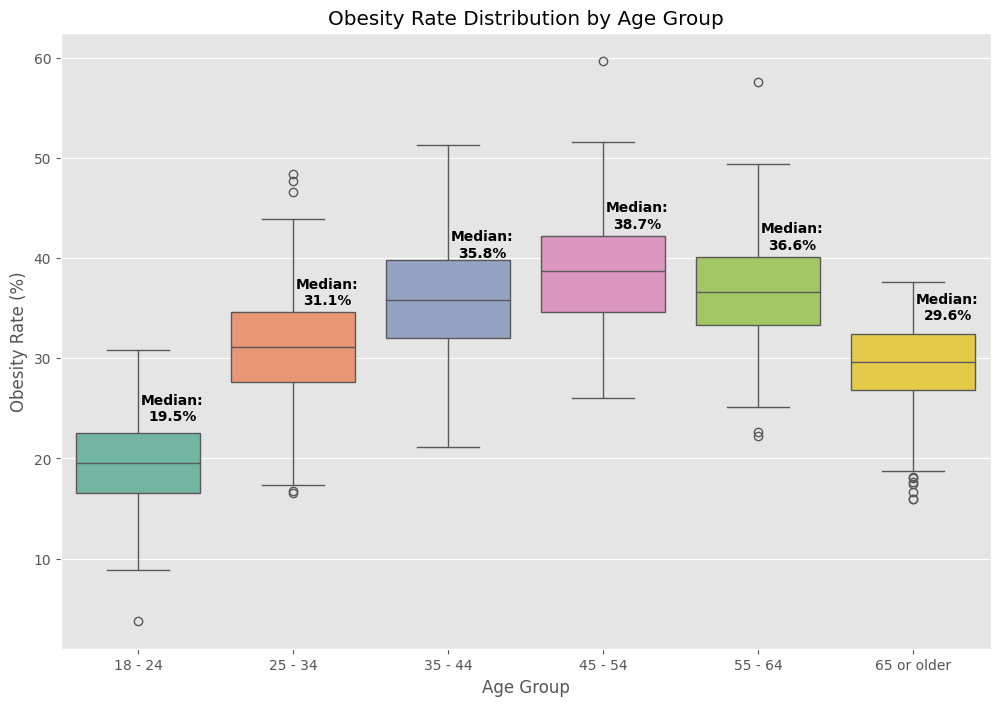

In [187]:
# Create violin plot
sns.boxplot(data=age_complete, x='Age', y='Proportion(%)', palette='Set2')
plt.title('Obesity Rate Distribution by Age Group')
plt.ylabel('Obesity Rate (%)')
plt.xlabel('Age Group')
# display medians on the plot
for i, (age_group, median_val) in enumerate(medians.items()):
    plt.text(i+0.22, median_val + 4, f'Median:\n{median_val:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

 * Obesity rates increase steadily from young adulthood (18–24) to middle age (45–54), then begin to decline slightly in older age (65+).

 * The median peaks at 38.7% for adults aged 45-54, while the lowest median is in the 18-24 group (19.5%)

### 💡 Key Findings from Obesity Rate by Age

* Obesity rises with age, peaking in midlife, possible reasons could be:
  * Slower metabolism
  * Unable to Work-life balance
  * Family pressures limiting time for health

* Young adults show significantly lower rates, possible reasons could be:
  * Higher activity levels
  * Faster metabolism
  * More aware of outlook/weight

* Older adults show a decline in obesity, possible reasons could be:
  * Increased health awareness or dietary changes
  * Sadly but survivor bias, less healthy individuals may not remain in sample


## Explore Relationship between Obesity Rate and Physical Activity

### Extract Subset related to obesity rate and inactivity

* Records from 2016-2023, using states level and using total adult population data

* Around 2% of missing data, dropped missing records.

In [189]:
# Extract subset, use records related to two question, and use total demographic records only
activity_obesity = df_2016_2023[((
    df_2016_2023['Question'] == 'Obesity(%)') | (df_2016_2023['Question'] == 'Inactivity(%)')) &
                                (df_2016_2023['Total'] == 'Total') & (df_2016_2023['State'] != 'National')][['Year', 'State', 'Question', 'Proportion(%)']]
activity_obesity.head(3), activity_obesity.shape

(    Year   State       Question  Proportion(%)
 21  2017   Idaho  Inactivity(%)           24.2
 77  2016  Alaska     Obesity(%)           31.4
 79  2016  Alaska  Inactivity(%)           19.1,
 (860, 4))

In [190]:
# Create pivot table
activity_pivot = activity_obesity.pivot_table(
    index=['Year', 'State'], columns='Question', values='Proportion(%)', dropna=False).reset_index()

In [191]:
# Check null prop., around 2% missing records
for col in activity_pivot.columns:
    pct_missing = np.mean(activity_pivot[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Year - 0%
State - 0%
Inactivity(%) - 2%
Obesity(%) - 2%


In [193]:
# drop missing records
activity_pivot.dropna(inplace=True)

## Visualization of Obesity Rate vs. Physical Inactivity Rate

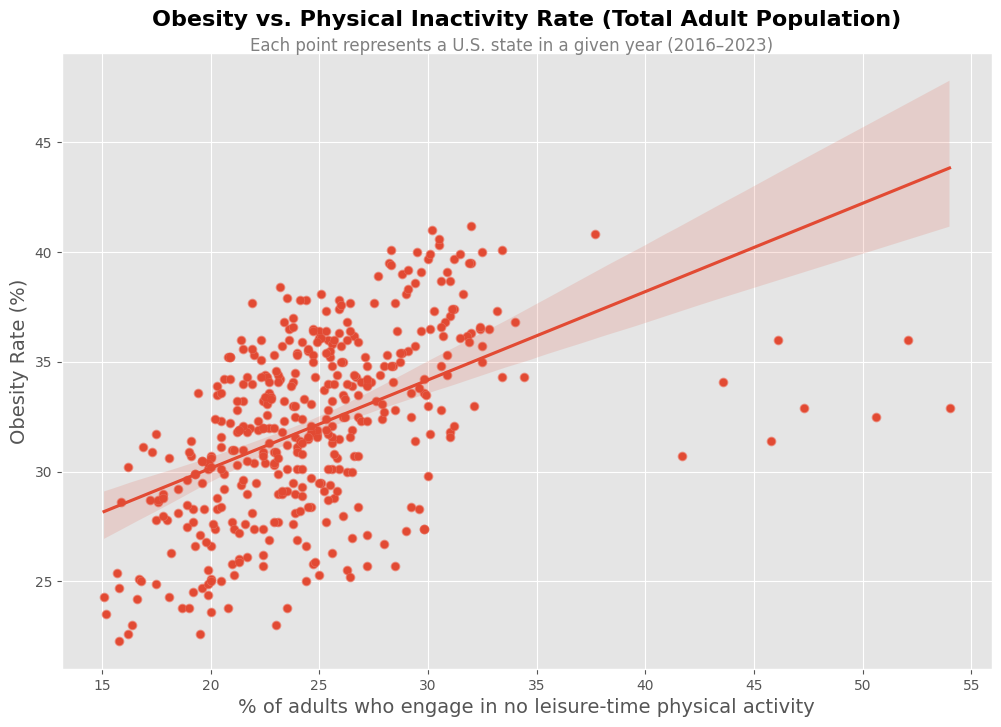

In [194]:
# scatter plot, inactivity vs obesity
sns.scatterplot(data=activity_pivot, x='Inactivity(%)', y='Obesity(%)')
plt.title('Obesity vs. Physical Inactivity Rate (Total Adult Population)', fontsize=16, fontweight='bold', y=1.03)
sns.regplot(data=activity_pivot, x='Inactivity(%)', y='Obesity(%)', scatter_kws={'alpha':0.5})
plt.suptitle('Each point represents a U.S. state in a given year (2016–2023)', fontsize=12, y=0.9, color='gray')
plt.ylabel('Obesity Rate (%)', fontsize=14)
plt.xlabel('% of adults who engage in no leisure-time physical activity', fontsize=14);

* the plot shows a strong positive relationship between state-level inactivity and obesity rates.

* States with higher percentages of physically inactive adults tend to report higher obesity rates in the same year.

* Because this uses total population data, it reflects state-level trends, not individual differences

### 💡 Key Findings from Inactivity vs Obesity Rate

* States with higher physical inactivity rates tend to have higher adult obesity rates.

* The positive trend holds across multiple years, despite some state-to-state variation.

* While correlation doesn’t confirm causation, this pattern supports the idea that inactivity is a contributing behavioral factor in obesity.

## EDA Conclusion

### Summary:
In the exploratory phase, I analyzed obesity trends and distributions across key demographics (race/ethnicity, income, education, sex, and age), as well as behavioral factors like physical inactivity. I also explored national and state-level trends over time.
<br> <br>
### 💡 Key Insights:
* Obesity has increased steadily nationwide from 2016 to 2022, with a slight drop in 2023.

* Education and income show a clear inverse relationship with obesity, higher education and income correlate with lower and more stable obesity rates.

* Race/ethnicity disparities exist, with Hispanic and Non-Hispanic Black adults showing higher obesity rates on average, while Asian adults show lower rates on average.

* Age demonstrates a peak in midlife (45-54), with lower rates among youngder and older adults.

* Physical inactivity is positively correlated with obesity at the state level, reinforcing behavioral factors in public health outcomes.


### Limitations:

* Not all variables were consistently reported across all years or states.

* This analysis is observational; patterns do not imply direct causation.
